**KNN- classify a person having diabetes or not**

In [72]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [73]:
diabetes_df = pd.read_csv('diabetes.csv')

In [74]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [75]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


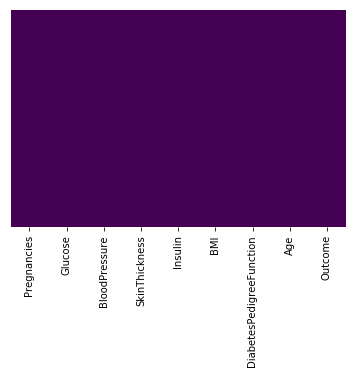

In [76]:
sns.heatmap(diabetes_df.isnull(),yticklabels=False, cbar=False, cmap='viridis')

In [77]:
no_zero = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

In [78]:
for col in no_zero:
    #diabetes_df[col] = diabetes_df.replace(0,np.NaN)
    mean = int(diabetes_df[col].mean(skipna=True))
    diabetes_df[col]= diabetes_df.replace(0,mean)

In [79]:
#diabetes_df[diabetes_df['Glucose']==0]['Glucose'].value_counts()

In [80]:
X = diabetes_df.drop('Outcome',axis=1)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,6.0,6.0,6.0,6.0,6.0,0.627,50
1,1,1.0,1.0,1.0,1.0,1.0,0.351,31
2,8,8.0,8.0,8.0,8.0,8.0,0.672,32
3,1,1.0,1.0,1.0,1.0,1.0,0.167,21
4,0,120.0,69.0,20.0,79.0,31.0,2.288,33


In [81]:
y= diabetes_df['Outcome']
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [105]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=0.2)

In [106]:
#Feature Scaling
fs = StandardScaler()
X_train = fs.fit_transform(X_train)
X_test = fs.transform(X_test)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [107]:
np.sqrt(len(y_test))

12.409673645990857

In [125]:
classifier = KNeighborsClassifier(n_neighbors=11,p=2,metric='euclidean')

In [126]:
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

In [127]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[83, 24],
       [27, 20]])

In [128]:
f1_score(y_test,y_pred)

0.43956043956043955

In [129]:
accuracy_score(y_test,y_pred)

0.6688311688311688